In [1]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve, cross_val_score

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
df = pd.read_csv(url)
print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [4]:
print(df.describe())

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
print(cdf.head())

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244


In [7]:
print(cdf.describe().transpose())

                       count        mean        std    min    25%    50%  \
ENGINESIZE            1067.0    3.346298   1.415895    1.0    2.0    3.4   
CYLINDERS             1067.0    5.794752   1.797447    3.0    4.0    6.0   
FUELCONSUMPTION_COMB  1067.0   11.580881   3.485595    4.7    9.0   10.9   
CO2EMISSIONS          1067.0  256.228679  63.372304  108.0  207.0  251.0   

                         75%    max  
ENGINESIZE              4.30    8.4  
CYLINDERS               8.00   12.0  
FUELCONSUMPTION_COMB   13.35   25.8  
CO2EMISSIONS          294.00  488.0  


In [14]:
# Section 3: Traitement des Données
print(df.shape)

(1067, 13)


In [9]:
print(df.isnull().sum())

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(1067, 13)

In [13]:
# Section 4: Visualisation des Données
viz = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

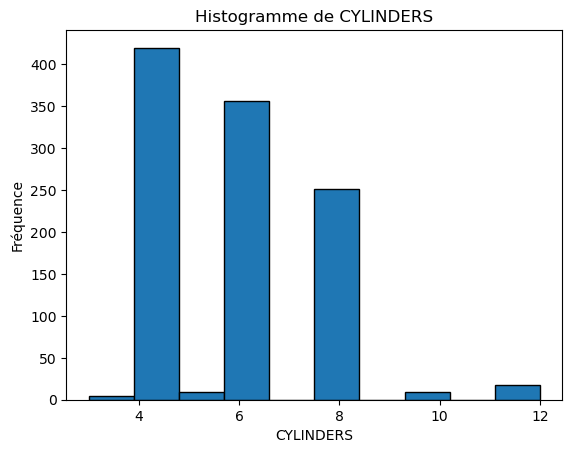

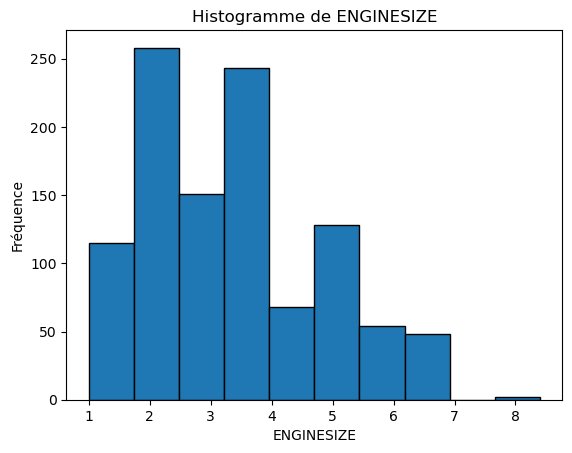

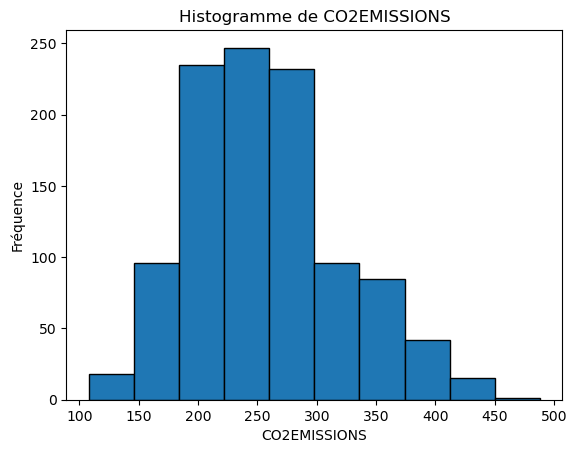

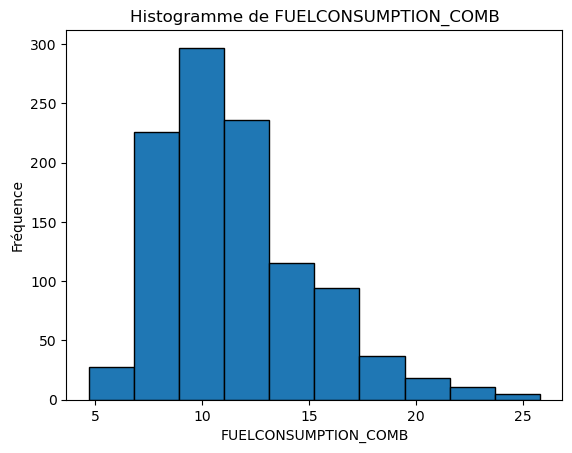

In [15]:
for column in viz.columns:
    plt.hist(viz[column], bins=10, edgecolor='black')
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()

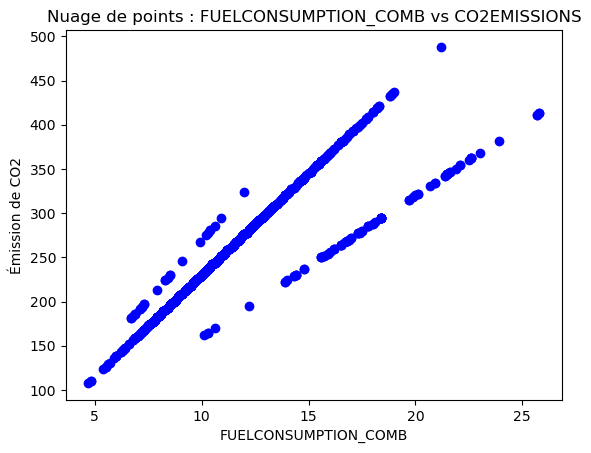

In [16]:
# Nuage de points pour FUELCONSUMPTION_COMB vs CO2EMISSIONS
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Émission de CO2")
plt.title("Nuage de points : FUELCONSUMPTION_COMB vs CO2EMISSIONS")
plt.show()

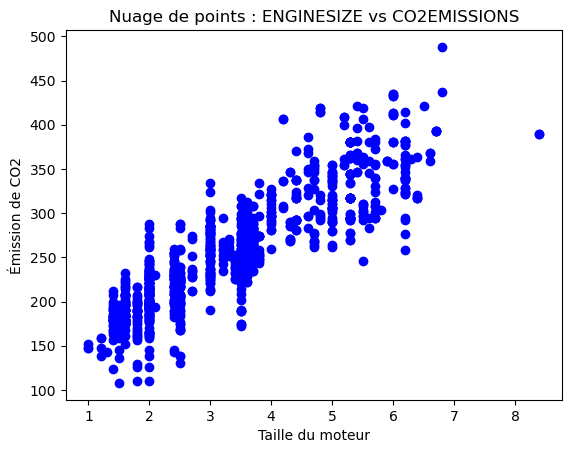

In [17]:
# Nnuage de points pour ENGINESIZE vs CO2EMISSIONS
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Taille du moteur")
plt.ylabel("Émission de CO2")
plt.title("Nuage de points : ENGINESIZE vs CO2EMISSIONS")
plt.show()

In [18]:
# Section 5: Préparation des Données pour la Modélisation
# Masque aléatoire pour diviser les données en ensembles d'entraînement et de test
msk = np.random.rand(len(df)) < 0.8
# Création de l'ensemble d'entraînement et l'ensemble de test
train = cdf[msk]
test = cdf[~msk]

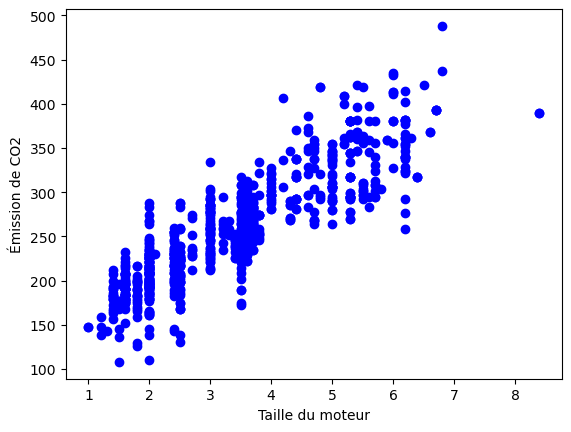

In [19]:
# Tracage  d'un nuage de points pour Engine Size vs CO2 Emission dans l'ensemble d'entraînement
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Taille du moteur")
plt.ylabel("Émission de CO2")
plt.show()

In [20]:
# Section 6: Modélisation - Régression Linéaire
regr = linear_model.LinearRegression()
# Préparation les données d'entraînement
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# Entraînement le modèle de régression linéaire
regr.fit(train_x, train_y)

LinearRegression()

In [21]:
# Affichage les coefficients et l'intercept
print('Coefficients : ', regr.coef_)
print('Intercept : ', regr.intercept_)

Coefficients :  [[38.63522094]]
Intercept :  [127.7592681]


Text(0, 0.5, 'Émission de CO2')

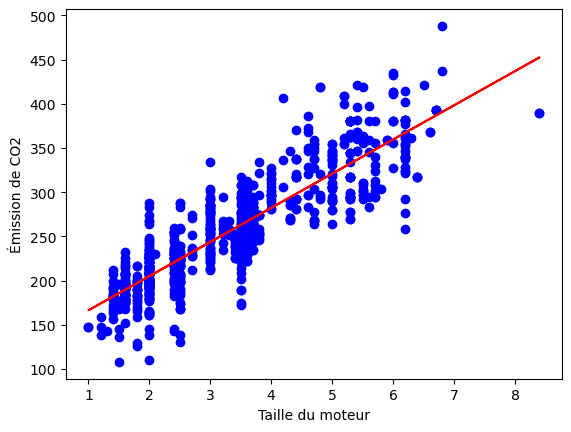

In [22]:
# Traceage le modèle de régression sur l'ensemble d'entraînement
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
plt.xlabel("Taille du moteur")
plt.ylabel("Émission de CO2")

In [23]:
# Préparation les données de test
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
# Prédiction les émissions de CO2 sur l'ensemble de test
test_y_ = regr.predict(test_x)

In [24]:
# Affichage les métriques de performance du modèle sur l'ensemble de test
print("Erreur absolue moyenne : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Somme des carrés des résidus (MSE) : %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score : %.2f" % r2_score(test_y, test_y_))

Erreur absolue moyenne : 24.36
Somme des carrés des résidus (MSE) : 1089.60
R2-score : 0.75


In [25]:
# Section 7: Évaluation du Modèle
# Affichage de la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    regr, train_x, train_y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5))

In [26]:
# Calculez la moyenne et l'écart type des scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

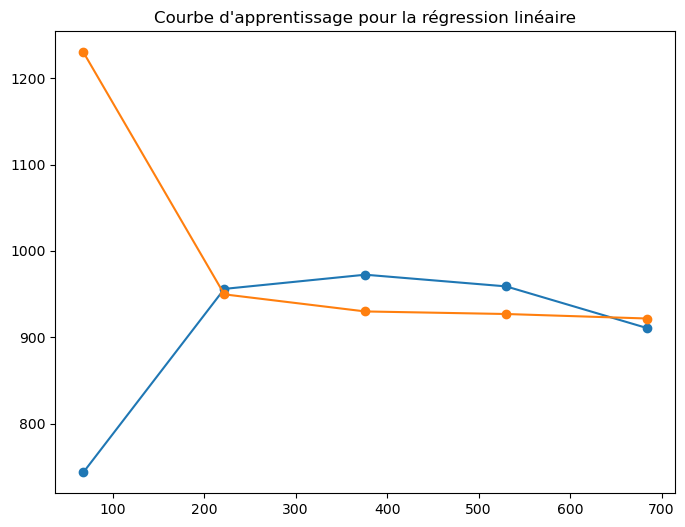

In [27]:
# Tracez la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.title("Courbe d'apprentissage pour la régression linéaire")
plt.plot(train_sizes, train_scores_mean, 'o-', label='Erreur d\'entraînement (MSE)')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Erreur de validation (MSE)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


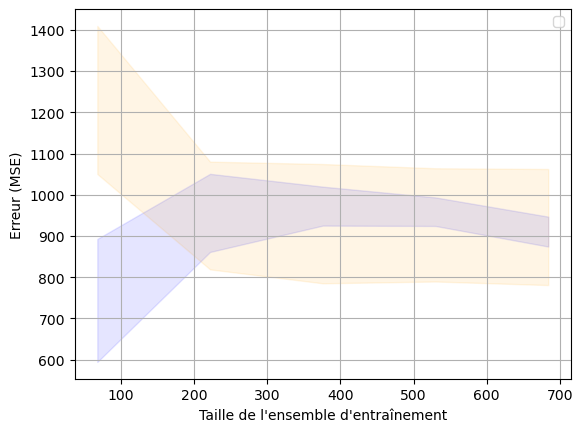

In [28]:
# Zone ombrée pour l'écart type
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Erreur (MSE)")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Ajouter la validation croisée
cv_scores = cross_val_score(regr, train_x, train_y, cv=5, scoring='r2')
print("Scores de validation croisée (R2):", cv_scores)
print("Score moyen de validation croisée (R2):", np.mean(cv_scores))

Scores de validation croisée (R2): [0.76000184 0.76063137 0.7091645  0.76278945 0.78995053]
Score moyen de validation croisée (R2): 0.7565075372660437
